## 20daysofcode Challenge
**ML | Day 3: EXPLORING THE IRIS DATASET**
- Load the iris dataset from sklearn into a pandas dataframe with the columns correctly named.
- Generate a dataframe showing the correlation of all the labels with themselves and the target variable using the SPEARMAN'S. RANK CORRELATION.
- Using the matplotlib library, visualize the individual relationships between the features and the target. Comment on your plots using markdown cells.
- Normalize the data using the Z-SCORE method.

*PUN: I see that the ML mentors made the pupils(students) to work on the iris dataset*

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

### Get Dataset

In [2]:
from sklearn.datasets import load_iris

### Load Dataset

In [3]:
iris_data = load_iris()

### Convert dataset to pandas Dataframe

In [4]:
#convert iris.data (i.e feature variables) to dataframe
iris = pd.DataFrame(data=iris_data['data'], columns=iris_data['feature_names'])
#display first few rows
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#add iris dataset target column to dataframe above, naming it 'species'
iris['species']=iris_data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Column Renaming

In [6]:
#display the dataset columns
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

To make the column names easier to work with, I decided to clean it up a bit
- remove '(cm)' from columns and 
- replace space between words with an underscore '_' - In line with the python-recommended snake_case naming convention for column names

In [7]:
iris.columns = iris.columns.str.replace('\(cm\)', '').str.strip().str.replace(' ','_')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
68,6.2,2.2,4.5,1.5,1
83,6.0,2.7,5.1,1.6,1
131,7.9,3.8,6.4,2.0,2


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


We have 150 samples, 4 feature variables, 1 target variable. Also, there are no missing values in our dataset.

### Relationship between features 
##### Spearman's Rank Correlation

In [10]:
iris.corr('spearman')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.166778,0.881898,0.834289,0.798078
sepal_width,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal_length,0.881898,-0.309635,1.000000,0.937667,0.935431
petal_width,0.834289,-0.289032,0.937667,1.000000,0.938179
species,0.798078,-0.440290,0.935431,0.938179,1.000000


### Visual Relationships between Feature Variables and the target variable (species)

In [11]:
#Function to use to visualize the relationships between dataset variables
def compare_features(x, y, colour):
    #set axis name
    X = x.title()
    Y = y.replace('_', ' ').title()
        
    #set plot area size
    fig, ax = plt.subplots(figsize=(8,7))

    #scatter plot the two variables
    plt.scatter(iris[x], iris[y], s= 20, c=colour)

    #set axis label
    plt.xlabel(X)
    plt.ylabel(Y)

    #set plot title
    plt.title(f'{Y}(cm) VS {X}')
    
    #remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #display plot
    plt.show()

Also it should be noted that:
- Iris setosa is labeled as 0
- Iris versicolor is labeled as 1
- Iris virginica as labeled 2

##### Relationship bewteen petal width and species

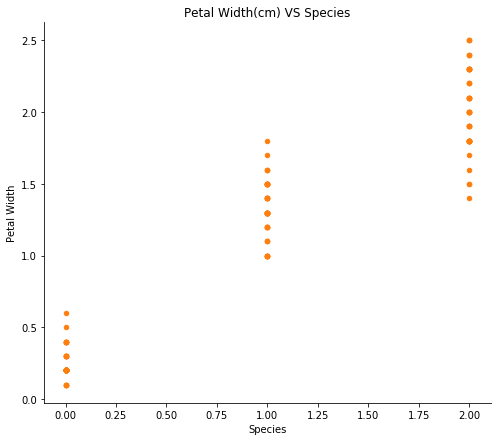

In [12]:
compare_features('species' ,'petal_width', 'C1')

- Iris setosa(0) clearly has the narrowest petal of the three species (between 0.1 - approx 0.5 cm)
- Iris virginica(2) have the widest petal of the three, growing as long as 2.5cm
- Although, the petals of some iris versicolor(1) are as wide as iris virginica(2) (between the 1.75 - 1.9cm range)

##### Relationship bewteen petal length and species

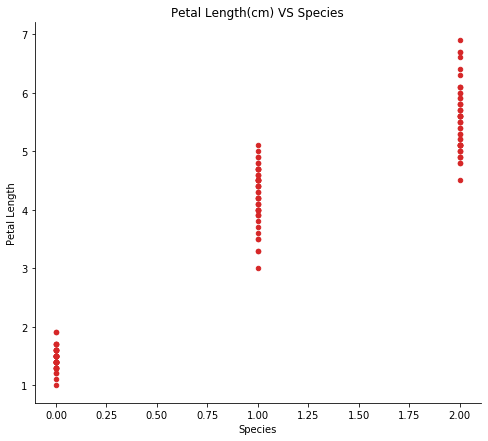

In [13]:
compare_features('species' ,'petal_length', 'C3')

- Iris setosa(1) petals are the shortest of the three ranging between 1 - 2cm
- Iris virginica(2) has the longest petals of the three species, with petals extended past 6cm and as long as 7cm
- Although, the petals of some iris versicolor(1) are as long as some iris virginica(2)  \(between 4 - 5.3cm)

##### Relationship bewteen sepal width and species

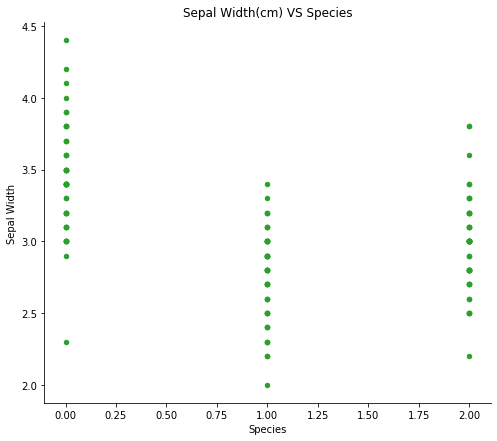

In [14]:
compare_features('species', 'sepal_width', 'C2')

- It appears Iris setosa(0) has the widest sepal of the three species and there seem to be an outlier around sepal length 2.3cm
- Sepals of Iris versicolor(1) and iris virginica(2) has are as wide as each other

##### Relationship bewteen sepal length and species

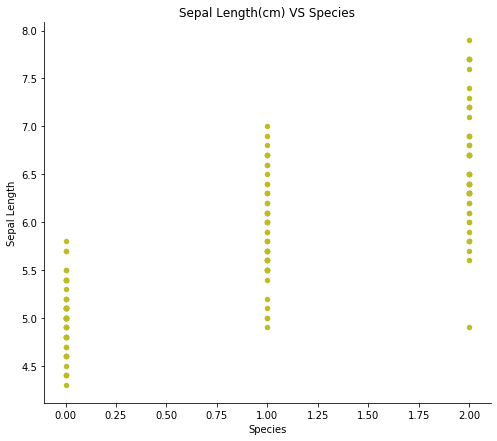

In [15]:
compare_features('species' ,'sepal_length', 'C8')

- Iris setosa(0) petals are the shortest of the three, but some can grow close to 6cm.
- Sepal length range of Iris versicolor(1) is in between the average lengths of iris setosa(0) and virginica(2) respectively
- Iris virginica(2) has the longest sepals of the three species, extending as long as 7.5 - 8cm

### Feature Scaling 

In [18]:
#Standardization

#Split the dataset into feature and target variables
X = iris.drop('species', axis=1)
Y = iris['species']

# standardize the feature variable
scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)
standardized_X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      